In [4]:
from src.dataset.dance_video_aug import HumanDanceVideoAugDatasetCrop, HumanDanceVideoAugDatasetForLoRA
import matplotlib.pyplot as plt
import numpy as np
# import torch
import random
from PIL import Image
from src.utils.util import get_fps, read_frames, save_videos_from_pil
import cv2
from accelerate import Accelerator

from src.utils.util import (
    seed_everything,
)

from tqdm import tqdm

In [5]:
seed_everything(12580)

In [9]:
dataset = HumanDanceVideoAugDatasetForLoRA(
    sample_rate=2,
    n_sample_frames=16,
    width=512,
    height=512,
    img_scale=(1.0, 1.0),
    img_ratio=(0.8, 0.8),
    video_scale=(1.0, 1.0),
    video_ratio=(0.8, 0.8),
    data_meta_paths=["/cephfs/SZ-AI/usr/liuchenyu/HaiLook/Moore-AnimateAnyone/data/augmented_meta.json"],
    background_dir="/cephfs/SZ-AI/usr/liuchenyu/HaiLook/Moore-AnimateAnyone/backgrounds"
)

/cephfs/SZ-AI/usr/liuchenyu/HaiLook/vid_dataset/stage2_dataset/A1P10LXQgGS.mp4


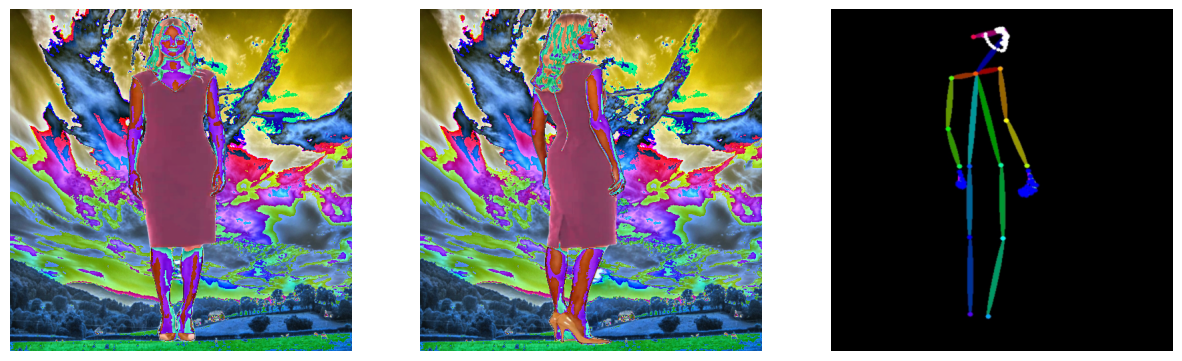

In [10]:
index = random.choice(np.arange(900))
sample= dataset.__getitem__(index)
print(sample["video_dir"])

fig1, axs = plt.subplots(1, 3, figsize=(15, 8))
img_list_aug = [sample["pixel_values_ref_img"], sample["pixel_values_vid"][0], sample["pixel_values_pose"][0]]

for i, img in enumerate(img_list_aug):
    img = img.permute(1,2,0) 
    img = (img.numpy() * 255).astype(np.uint8)
    img = Image.fromarray(img)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

In [11]:
pose_list = []
vid_list = []

for i in range(len(sample["pixel_values_vid"])):
    pose = sample["pixel_values_pose"][i].permute(1,2,0) 
    pose = Image.fromarray((pose.numpy() * 255).astype(np.uint8))
    vid = sample["pixel_values_vid"][i].permute(1,2,0) 
    vid = Image.fromarray((vid.numpy() * 255).astype(np.uint8))
    pose_list.append(pose)
    vid_list.append(vid)


save_videos_from_pil(pose_list, "/cephfs/SZ-AI/usr/liuchenyu/HaiLook/Moore-AnimateAnyone/exp_output/test_vid/pose.mp4", fps=30)

save_videos_from_pil(vid_list, "/cephfs/SZ-AI/usr/liuchenyu/HaiLook/Moore-AnimateAnyone/exp_output/test_vid/vid.mp4", fps=30)
    